In [1]:
from pypelines import BasePipeline, BaseStep, BasePipe, PickleObject, Session, stepmethod
from pypelines.examples import example_pipeline

In [2]:
pline = BasePipeline("preproc_data")


@pline.register_pipe 
class compress_videos(BasePipe) :
    
    single_step = True
        
    @stepmethod(requires = ["rois_df.step1","trials_roi_df.aggregate"])
    def step(self):
        """zaea
        """
        #comment here comment there

        monfion = "est fat"
        
        return  "blabla" 

@pline.register_pipe
class suite2p(BasePipe) :

    @stepmethod(requires = ["compress_videos.step"])
    def do_this(self,*args,**kwargs):
        print(self)
        print(args)
        print(kwargs)
    
    @stepmethod(requires = ["suite2p.do_this"])
    def step2(self,):
        return "something"

@pline.register_pipe 
class trials_roi_df(BasePipe) :
    
    single_step = True
        
    @stepmethod()
    def aggregate(self):
        """zaea
        """
        #comment here comment there

        monfion = "est fat"
        
        return  "blabla" 

@pline.register_pipe# this wrapper is called after the internal wrappers, so we will be able to finish utility things with it. # this step instanciates a registered class into the Pipeline, then returns the uninstanciated class in case they must be used by other pipelines.
class trials_df(BasePipe):

    single_step = True
    use_versions = True # by default, if more than one worker is registered, this is set to true, except is explicitly set to false like this.

    """arguments that the Pipe will use : 

    - extra = info related to anything the user may want. It can be a simple string, a dict with keys related to folder location, or anything else that may help the user find the location of the file.
    - session = info related to the base location of the files. In pandas series format. It must contain a path attribute/item, and an alias item. subject etc are somewhat optionnal for my case i would say. 
        I will have to see if i can extend acessors externally (plugin methodo ?) to suit my purposes.
    - version = a version must be a string (a hash, whatever length, but a string) that allows to look up in a versions.json file to match what was the associated worker step, and it's relation in the hierarchy of steps.
    """

    @stepmethod()
    def initial(self):
        print(self) #this is a pipe instance, not a step, we will need to see if this is a good idea or not

@pline.register_pipe
class rois_df(BasePipe) :

    @stepmethod(requires = ["trials_df.initial"], version = "1")
    def step1(self, session, extra):
        return "mesfesses"

    @stepmethod(requires = ["suite2p.step2"], version = "5")
    def step2(self):
        return "something"
    
@pline.register_pipe
class figures(BasePipe) :

    @stepmethod(requires = ["compress_videos.step"])
    def step1(self):
        pass

    @stepmethod(requires = ["figures.step1"])
    def step2(self):
        pass


pline.pipes

{'compress_videos': <compress_videos.step StepObject>,
 'suite2p': <BasePipe.suite2p PipeObject>,
 'trials_roi_df': <trials_roi_df.aggregate StepObject>,
 'trials_df': <trials_df.initial StepObject>,
 'rois_df': <BasePipe.rois_df PipeObject>,
 'figures': <BasePipe.figures PipeObject>}

In [3]:
session = Session(subject="wm32",date="2023-08-25",number=1,path=r"C:\test", auto_path = True)
disk = PickleObject(session, pline.suite2p.do_this, extra = "")

C:\test\wm32\2023-08-25\001\preprocessing_saves
preproc_data\.suite2p(?:\.(?P<step_name>(?:do_this)|(?:step2))(?:\.(?P<version>[^\.]*))?)?\.pickle
['preproc_data.suite2p.do_this.pickle', 'preproc_data.suite2p.pickle']
preproc_data\.suite2p(?:\.(?P<step_name>(?:do_this)|(?:step2))(?:\.(?P<version>[^\.]*))?)?\.pickle


In [10]:
pline.rois_df.step1.generate(session)

C:\test\wm32\2023-08-25\001\preprocessing_saves
preproc_data\.rois_df(?:\.(?P<step_name>(?:step1)|(?:step2))(?:\.(?P<version>[^\.]*))?)?\.pickle
['preproc_data.rois_df.step1.1.pickle']
preproc_data\.rois_df(?:\.(?P<step_name>(?:step1)|(?:step2))(?:\.(?P<version>[^\.]*))?)?\.pickle
C:\test\wm32\2023-08-25\001\preprocessing_saves
preproc_data\.rois_df(?:\.(?P<step_name>(?:step1)|(?:step2))(?:\.(?P<version>[^\.]*))?)?\.pickle
['preproc_data.rois_df.step1.1.pickle']
preproc_data\.rois_df(?:\.(?P<step_name>(?:step1)|(?:step2))(?:\.(?P<version>[^\.]*))?)?\.pickle


'mesfesses'

In [4]:
print(disk.make_file_name_pattern())

preproc_data\.suite2p(?:\.(?P<step_name>(?:do_this)|(?:step2))(?:\.(?P<version>[^\.]*))?)?\.pickle
preproc_data\.suite2p(?:\.(?P<step_name>(?:do_this)|(?:step2))(?:\.(?P<version>[^\.]*))?)?\.pickle


In [7]:
print(disk.check_disk())

C:\test\wm32\2023-08-25\001\preprocessing_saves
preproc_data\.suite2p(?:\.(?P<step_name>(?:do_this)|(?:step2))(?:\.(?P<version>[^\.]*))?)?\.pickle
['preproc_data.suite2p.do_this.pickle', 'preproc_data.suite2p.pickle']
preproc_data\.suite2p(?:\.(?P<step_name>(?:do_this)|(?:step2))(?:\.(?P<version>[^\.]*))?)?\.pickle
True


In [8]:
print(disk.save("caca"))

None


In [9]:
print(disk.save("caca"))

None


In [10]:
print(disk.save("caca"))

None


In [11]:
print(disk.save("caca"))

None


In [12]:
print(disk.load())

caca


[('a', <dict_keyiterator object at 0x00000188E1C2BA60>, deque([0, 1]), deque([-1, -1]))]
['b', 'c']
b
c
c
d
h
h
[('e', <dict_keyiterator object at 0x00000188E2DCF0B0>, deque([0]), deque([-1]))]
['f']
f
c
g
h
h


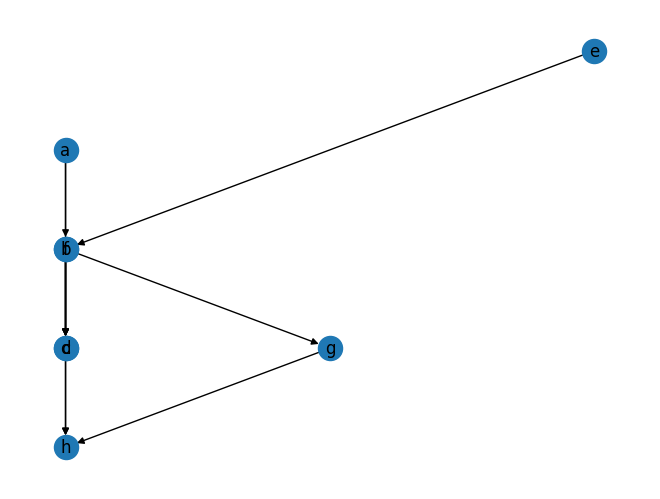

In [6]:
import networkx as nx
from collections import deque

def tree_layout(G):

    roots = [node for node in G.nodes if G.in_degree(node) == 0]
    if not roots:
        print("Error: graph has no roots!")
        return None

    pos = {}
    base_x = 0
    next_x = 0
    for root in roots:
        qx = deque([next_x + xt for xt in range(0, G.out_degree(root))])
        qy = deque([0 - 1]*G.out_degree(root))
        next_x = base_x

        visited = {root}
        deque_content = [(root, iter(G[root]), qx, qy)]
        print(deque_content)
        print(list(iter(G[root])))
        queue = deque(deque_content)

        while queue:
            parent, children, qx, qy = queue.popleft()
            print(children)
            for child in children:
                print(child)
                #child = next(children)
                if child not in visited:
                    x = qx.popleft()
                    y = qy.popleft()
                    pos[child] = (x, y)
                    visited.add(child)
                    qx_child = deque([x+ xt for xt in range(0, G.out_degree(child))])
                    qy_child = deque([y - 1]*G.out_degree(child))
                    queue.append((child, iter(G[child]), qx_child, qy_child))
            #except StopIteration:
            

        pos[root] = (base_x, max([val[1] for val in pos.values()])+1) # place the root
        base_x = base_x + max([val[0] for val in pos.values()]) + 1

    return pos

# Use the function like this:
G = nx.DiGraph()
G.add_edge('a', 'b')
G.add_edge('a', 'c')
G.add_edge('b', 'c')
G.add_edge('b', 'd')
G.add_edge('b', 'h')
G.add_edge('f', 'c')
G.add_edge('c', 'h')
G.add_edge('e', 'f')
G.add_edge('f', 'g')
G.add_edge('g', 'h')
pos = tree_layout(G)
nx.draw(G, pos, with_labels=True)


NodeView(('prefetch.step', 'rois_df.step1', 'blabliblou.herewego', 'suite2p.do_this', 'suite2p.step2', 'trials_df.initial', 'rois_df.step2', 'side_step.step1', 'side_step.step2'))

[('blabliblou.herewego', <dict_keyiterator object at 0x0000017FC214FAB0>, deque([0]), deque([-1]))]
['prefetch.step']
prefetch.step
suite2p.do_this
side_step.step1
suite2p.step2
side_step.step2
rois_df.step2
[('trials_df.initial', <dict_keyiterator object at 0x0000017FBFEF7AB0>, deque([0]), deque([-1]))]
['rois_df.step1']
rois_df.step1
prefetch.step
suite2p.do_this
side_step.step1
suite2p.step2
side_step.step2
rois_df.step2


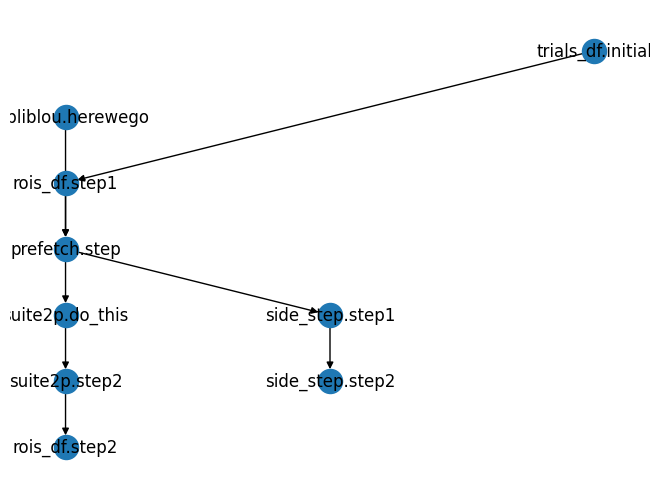

In [7]:
from networkx import draw
g = pline.get_graph()[1]
display(g.nodes)
pos = tree_layout(g)
draw(g, pos= pos, with_labels = True)

NodeView(('prefetch.step', 'other_steps.step1', 'suite2p.do_this', 'suite2p.step2', 'demoPipeClass.initial', 'other_steps.step2', 'side_step.step1', 'side_step.step2'))

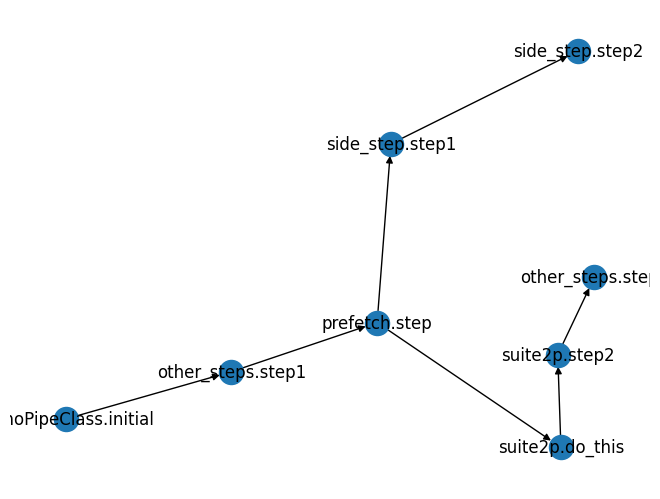

In [ ]:
from networkx import draw
g = pline.get_graph()[1]
display(g.nodes)
#pos = tree_layout(g)
draw(g,  with_labels = True)

NodeView(('prefetch.step', 'other_steps.step1', 'suite2p.do_this', 'suite2p.step2', 'demoPipeClass.initial', 'other_steps.step2', 'side_step.step1', 'side_step.step2'))

NetworkXError: Node 'other_steps.step1' has no position.

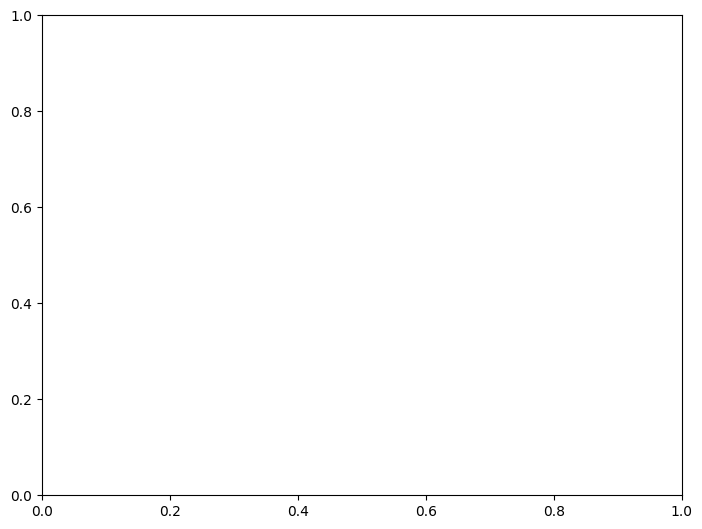

In [ ]:
from networkx import draw
g = pline.get_graph()[1]
display(g.nodes)
pos = tree_layout(g)
draw(g, pos= pos, with_labels = True)

NodeView(('prefetch.step', 'other_steps.step1', 'suite2p.do_this', 'suite2p.step2', 'demoPipeClass.initial', 'other_steps.step2', 'side_step.step1', 'side_step.step2'))

NetworkXError: Node 'other_steps.step1' has no position.

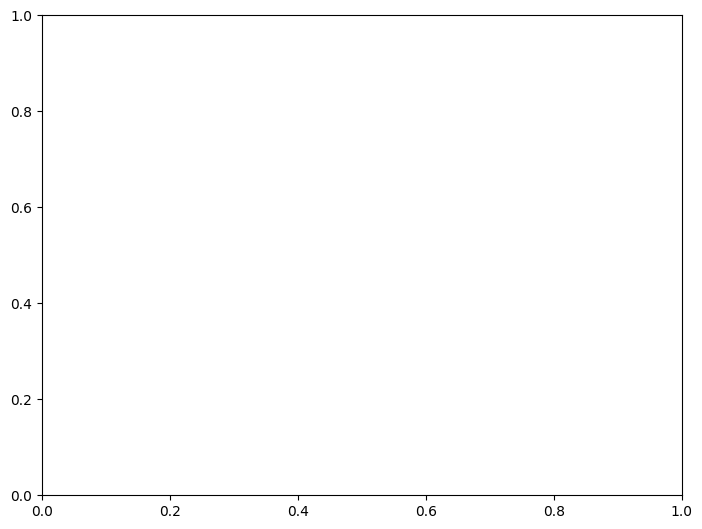

In [ ]:
from networkx import draw
g = pline.get_graph()[1]
display(g.nodes)
pos = tree_layout(g)
draw(g, pos= pos, with_labels = True)

NodeView(('prefetch.step', 'other_steps.step1', 'suite2p.do_this', 'suite2p.step2', 'demoPipeClass.initial', 'other_steps.step2', 'side_step.step1', 'side_step.step2'))

NetworkXError: Node 'other_steps.step1' has no position.

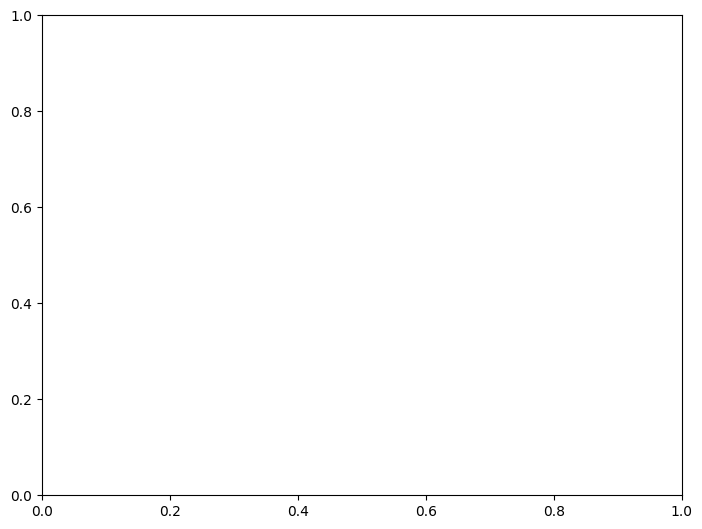

In [ ]:
from networkx import draw
g = pline.get_graph()[1]
display(g.nodes)
pos = tree_layout(g)
draw(g, pos= pos, with_labels = True)

NodeView(('prefetch.step', 'other_steps.step1', 'suite2p.do_this', 'suite2p.step2', 'demoPipeClass.initial', 'other_steps.step2', 'side_step.step1', 'side_step.step2'))

NetworkXError: Node 'other_steps.step1' has no position.

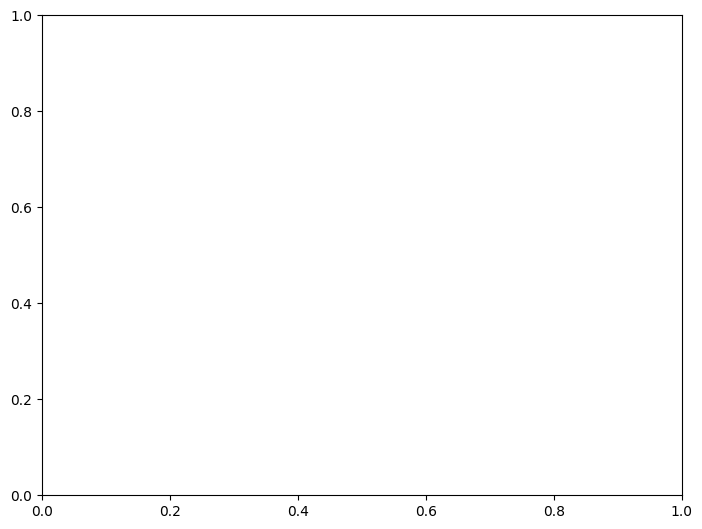

In [ ]:
from networkx import draw
g = pline.get_graph()[1]
display(g.nodes)
pos = tree_layout(g)
draw(g, pos= pos, with_labels = True)

NodeView(('prefetch.step', 'other_steps.step1', 'suite2p.do_this', 'suite2p.step2', 'demoPipeClass.initial', 'other_steps.step2', 'side_step.step1', 'side_step.step2'))

NetworkXError: Node 'other_steps.step1' has no position.

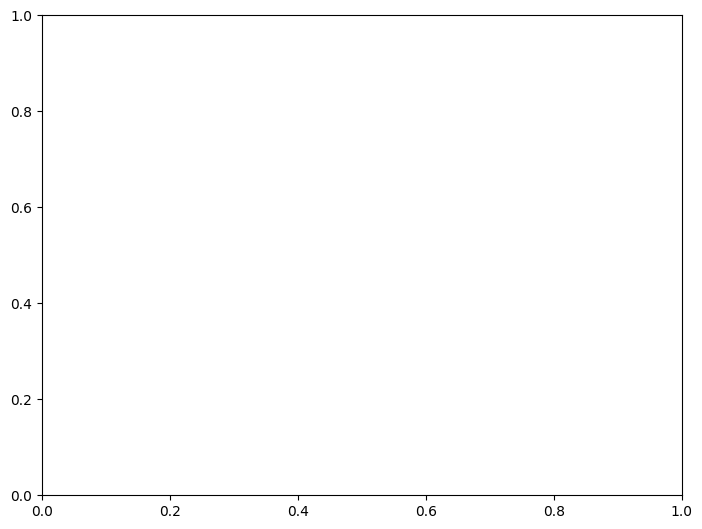

In [ ]:
from networkx import draw
g = pline.get_graph()[1]
display(g.nodes)
pos = tree_layout(g)
draw(g, pos= pos, with_labels = True)

NodeView(('prefetch.step', 'other_steps.step1', 'suite2p.do_this', 'suite2p.step2', 'demoPipeClass.initial', 'other_steps.step2', 'side_step.step1', 'side_step.step2'))

NetworkXError: Node 'other_steps.step1' has no position.

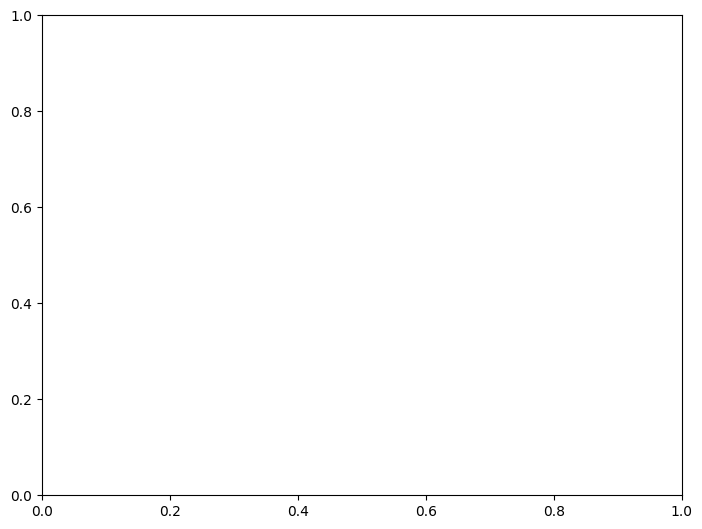

In [ ]:
from networkx import draw
g = pline.get_graph()[1]
display(g.nodes)
pos = tree_layout(g)
draw(g, pos= pos, with_labels = True)

In [ ]:
pline.demoPipeClass.steps

{'initial': <demoPipeClass.initial StepObject>}